# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [112]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [113]:
dados = pd.read_csv('dados/dataset.csv')

dados.shape

(9700, 11)

## Análise Exploratória

In [114]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [115]:
dados.isnull().sum()


ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [116]:
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [117]:
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [118]:
dados.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [119]:
# Primeiro filtramos o dataframe para trazer apenas os registros de categoria 'Office Supplies'
dados_p1 = dados[dados['Categoria'] == 'Office Supplies']
# Em seguida agrupamos por cidade e calculamos o total de valor_venda
valor_total_vendas = dados_p1.groupby('Cidade')['Valor_Venda'].sum()
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = valor_total_vendas.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)


Cidade com maior valor de venda para 'Office Supplies': New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [120]:
dados_p2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

dados_p2.head()

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744


<Figure size 2000x600 with 0 Axes>

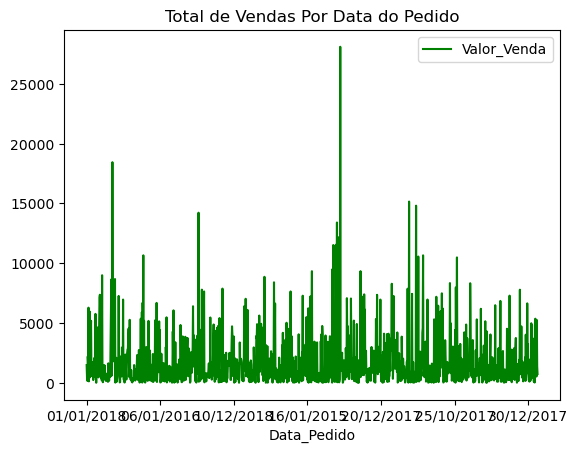

In [121]:
# Plot
plt.figure(figsize = (20, 6)) # Define o tamanho da figura em polegadas. O primeiro valor (20) é a largura e o segundo valor (6) é a altura. Neste caso, a figura terá uma largura de 20 polegadas e uma altura de 6 polegadas.
dados_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

O método reset_index() é usado para transformar o índice do DataFrame em uma coluna regular e criar um novo índice padrão (numérico) para o DataFrame. 

In [122]:
dados_p3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index()

dados_p3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


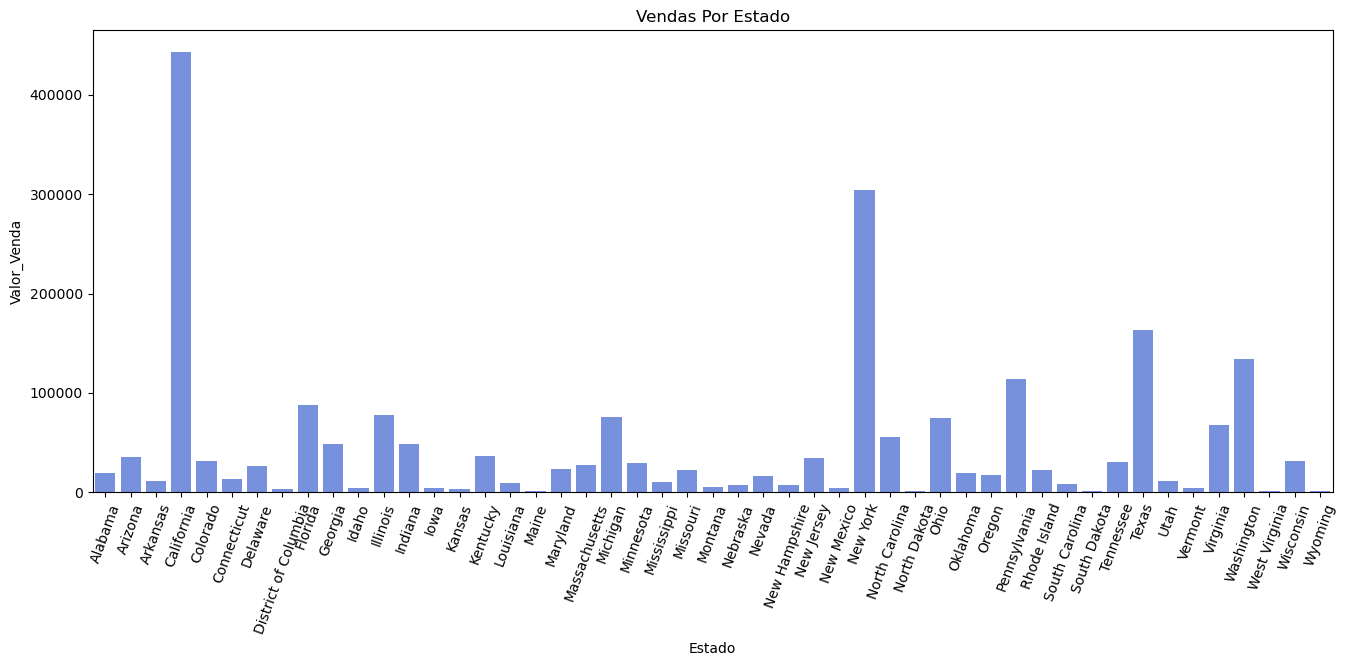

In [123]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = dados_p3, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [124]:
dados_p4 = dados.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',
                                                                                  ascending=False).head(10)

dados_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


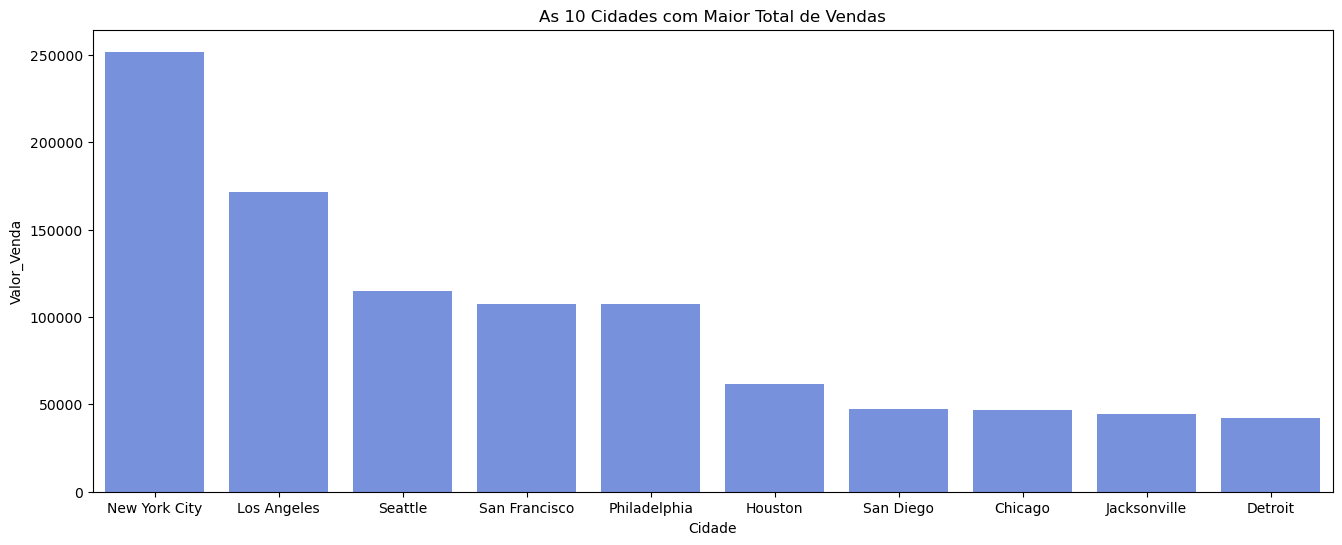

In [125]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = dados_p4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [126]:
dados_p5 = dados.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',
                                                                                    ascending=False)

dados_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


> Na parte de cima está trazendo o 'valor_venda' em notação cientifica. Com isso vamos formatr os dados para que o mesmo seja presentado em um gráfico de pizza

In [127]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

### Primeira Opção de Gráfico Pizza

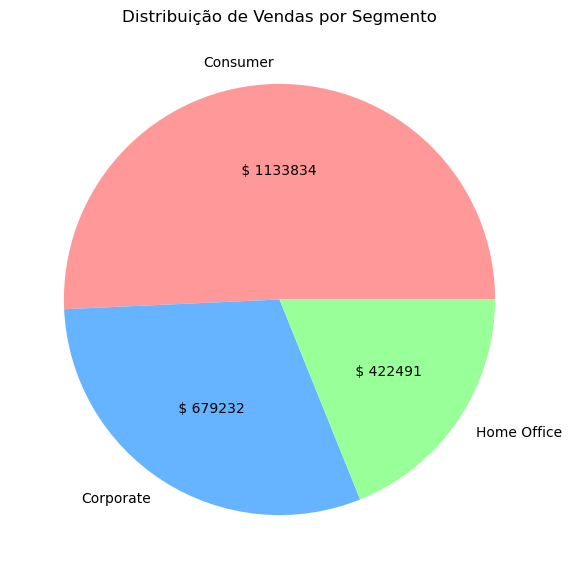

In [128]:
# Cores personalizadas para o gráfico de pizza
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Criar o gráfico de pizza com cores personalizadas
plt.figure(figsize=(10, 7))
plt.pie(dados_p5['Valor_Venda'], 
        labels=dados_p5['Segmento'], 
        autopct=autopct_format(dados_p5['Valor_Venda']),
        colors=cores)  # Adiciona a lista de cores
plt.title('Distribuição de Vendas por Segmento')
plt.show()

### Segunda opção de Gráfico Pizza

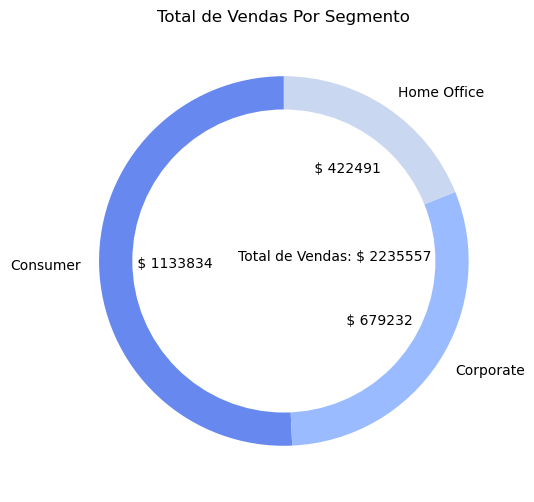

In [129]:
# Plot
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(dados_p5['Valor_Venda'], 
        labels = dados_p5['Segmento'],
        autopct = autopct_format(dados_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(dados_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [143]:
dados_por_ano = dados

# Convertendo a coluna 'Data_Pedido' para datetime
dados_por_ano['Data_Pedido'] = pd.to_datetime(dados_por_ano['Data_Pedido'], dayfirst=True)

# Extraindo o ano da coluna 'Data_Pedido'
dados_por_ano['Ano'] = dados_por_ano['Data_Pedido'].dt.year

# Agrupando por 'Segmento' e 'Ano', e calculando a soma de 'Valor_Venda'
dados_p6 = dados_por_ano.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

# Exibindo o resultado
dados_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [172]:
# Cria uma nova coluna de acordo com a regra definida acima
dados['Desconto'] = np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)

#dados['Desconto'].value_counts()

contagem_015 = dados['Desconto'].value_counts().get(0.15, 0)
contagem_010 = dados['Desconto'].value_counts().get(0.10, 0)

print(f'Número de ocorrências de desconto 0.15: {contagem_015}')
print(f'Número de ocorrências de desconto 0.10: {contagem_010}')


Número de ocorrências de desconto 0.15: 457
Número de ocorrências de desconto 0.10: 9243


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim